In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd

In [15]:
path='../Dataset'
for files in os.listdir(path):
    full_path=os.path.join(path,files)
    print(full_path)
    df=pd.read_csv(full_path)
    print(f'Head of {files} is:\n{df.head()}')

../Dataset\beach.csv
Head of beach.csv is:
  idbeach;"name";"city";"state";"country";"latitude";"longitude"
0  368;"Barra da Lagoa";"Florianopolis";"Santa Ca...            
1  369;"Joaquina";"Florianopolis";"Santa Catarina...            
2  370;"Mole";"Florianopolis";"Santa Catarina";"B...            
3  371;"Ingleses";"Florianopolis";"Santa Catarina...            
4  372;"Brava";"Florianopolis";"Santa Catarina";"...            
../Dataset\day_forecast.csv
Head of day_forecast.csv is:
  iddayforecast;"date";"sunrise";"sunset";"moonset";"moonrise";"moon_phase";"moon_illumination";"maxtemp";"mintemp";"idbeach"
0  334;"2020-02-25";"06:04 AM";"06:50 PM";"07:36 ...                                                                         
1  459;"2020-03-06";"06:10 AM";"06:40 PM";"04:37 ...                                                                         
2  460;"2020-03-06";"06:10 AM";"06:40 PM";"04:37 ...                                                                         
3  461

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

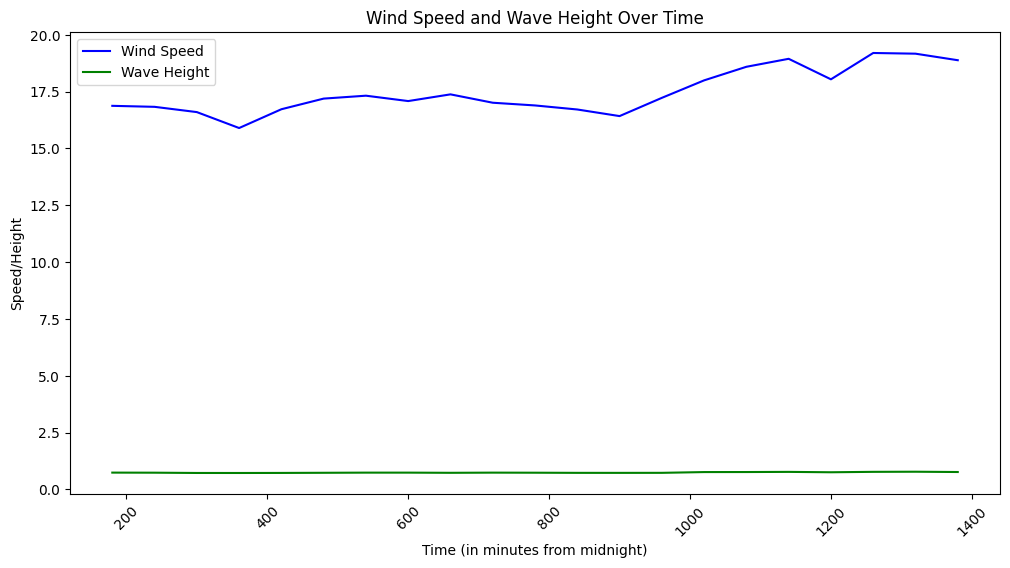

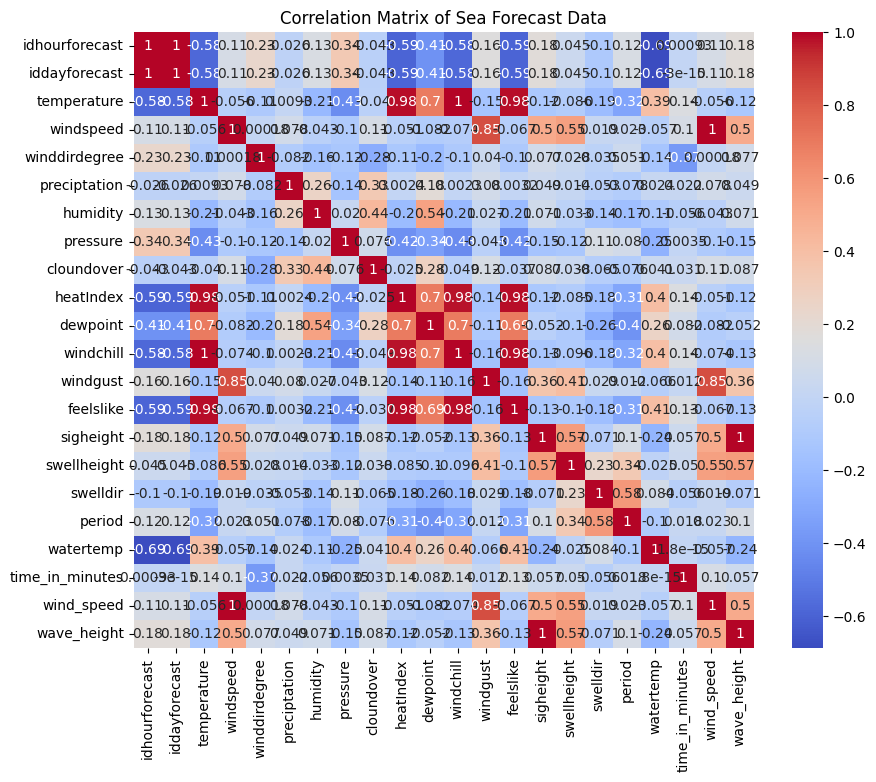

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
beach_data = pd.read_csv('../Dataset/beach.csv')
day_forecast_data = pd.read_csv('../Dataset/day_forecast.csv')
hour_forecast_data = pd.read_csv('../Dataset/hour_forecast.csv')

# Convert the 'time' column to proper datetime and extract the time part in minutes
hour_forecast_data['time_in_minutes'] = pd.to_datetime(hour_forecast_data['time'], format='%H%M', errors='coerce').dt.hour * 60 + pd.to_datetime(hour_forecast_data['time'], format='%H%M', errors='coerce').dt.minute

# Remove the original 'time' column since we can't use it for correlation
hour_forecast_data = hour_forecast_data.drop(columns=['time'])

# Rename columns for clarity
hour_forecast_data['wind_speed'] = hour_forecast_data['windspeed']
hour_forecast_data['wave_height'] = hour_forecast_data['sigheight']

# Group by time_in_minutes to check average wind speed and wave height
grouped_hour_data = hour_forecast_data.groupby('time_in_minutes').agg({
    'wind_speed': 'mean',
    'wave_height': 'mean'
}).reset_index()

# Plot the wind speed and wave height over time (in minutes from midnight)
plt.figure(figsize=(12, 6))
plt.plot(grouped_hour_data['time_in_minutes'], grouped_hour_data['wind_speed'], label='Wind Speed', color='blue')
plt.plot(grouped_hour_data['time_in_minutes'], grouped_hour_data['wave_height'], label='Wave Height', color='green')
plt.xlabel('Time (in minutes from midnight)')
plt.ylabel('Speed/Height')
plt.title('Wind Speed and Wave Height Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Correlation analysis between different metrics (excluding time column)
plt.figure(figsize=(10, 8))
sns.heatmap(hour_forecast_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sea Forecast Data')
plt.show()


Beach Data:
   idbeach            name           city           state country   latitude  \
0      368  Barra da Lagoa  Florianopolis  Santa Catarina  Brasil -27.572289   
1      369        Joaquina  Florianopolis  Santa Catarina  Brasil -27.629725   
2      370            Mole  Florianopolis  Santa Catarina  Brasil -27.602851   
3      371        Ingleses  Florianopolis  Santa Catarina  Brasil -27.423397   
4      372           Brava  Florianopolis  Santa Catarina  Brasil -27.399194   

   longitude  
0 -48.428124  
1 -48.450798  
2 -48.435063  
3 -48.401169  
4 -48.413608  

Day Forecast Data:
   iddayforecast       date  sunrise   sunset  moonset moonrise  \
0            334  2/25/2020  6:04 AM  6:50 PM  7:36 AM  8:16 PM   
1            459   3/6/2020  6:10 AM  6:40 PM  4:37 PM  2:27 AM   
2            460   3/6/2020  6:10 AM  6:40 PM  4:37 PM  2:27 AM   
3            461   3/6/2020  6:10 AM  6:40 PM  4:37 PM  2:27 AM   
4            462   3/6/2020  6:10 AM  6:40 PM  4:37 PM  2:27 A

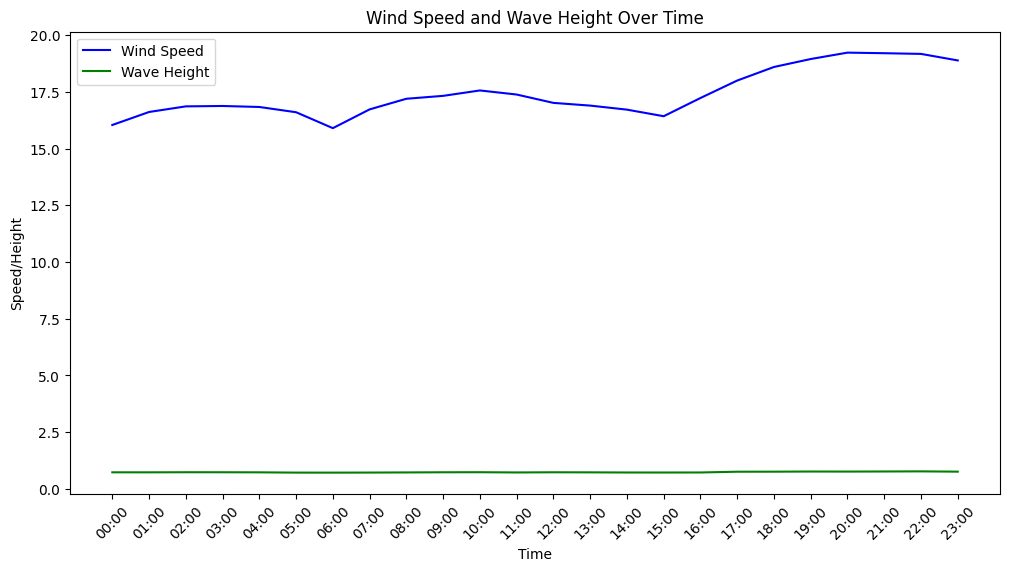

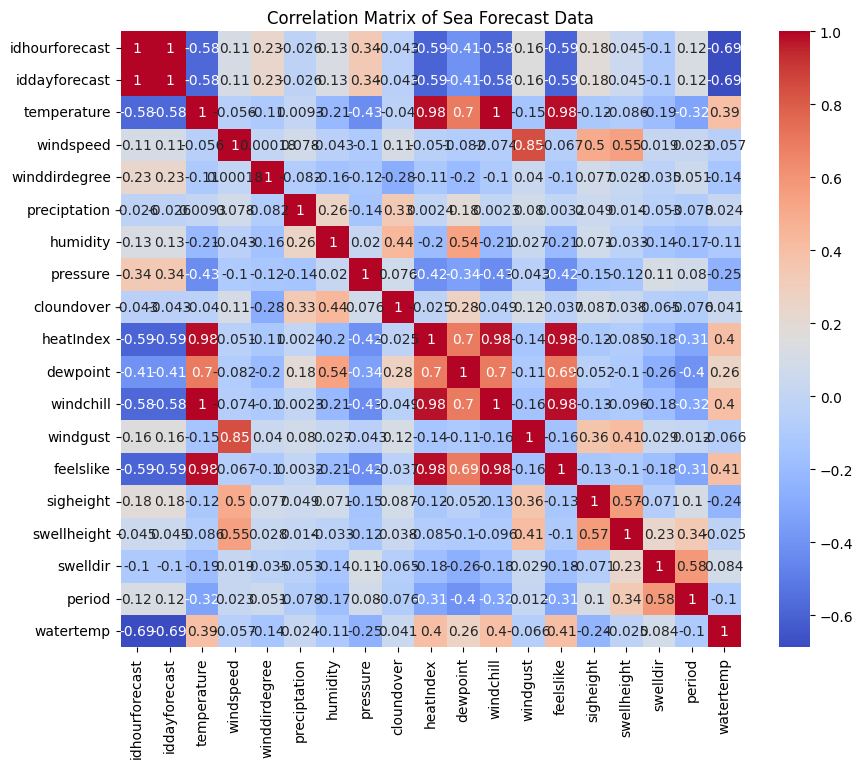

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
beach_data = pd.read_csv('../Dataset/beach.csv')
day_forecast_data = pd.read_csv('../Dataset/day_forecast.csv')
hour_forecast_data = pd.read_csv('../Dataset/hour_forecast.csv')
sea_condition_fact_data = pd.read_csv('../Dataset/sea_condition_fact.csv')
spot_data = pd.read_csv('../Dataset/spot.csv')
tide_data = pd.read_csv('../Dataset/tide.csv')

print("Beach Data:")
print(beach_data.head())

print("\nDay Forecast Data:")
print(day_forecast_data.head())

print("\nHour Forecast Data:")
print(hour_forecast_data.head())

print("\nMissing values in Hour Forecast Data:")
print(hour_forecast_data.isnull().sum())



hour_forecast_data['time'] = hour_forecast_data['time'].apply(lambda x: f"{int(x // 100):02}:{int(x % 100):02}")

print("\nHour Forecast Data after formatting time:")
print(hour_forecast_data[['time', 'temperature', 'windspeed', 'winddirdegree']].head())

hour_forecast_data['wind_speed'] = hour_forecast_data['windspeed']
hour_forecast_data['wave_height'] = hour_forecast_data['sigheight']

grouped_hour_data = hour_forecast_data.groupby('time').agg({
    'wind_speed': 'mean',
    'wave_height': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(grouped_hour_data['time'], grouped_hour_data['wind_speed'], label='Wind Speed', color='blue')
plt.plot(grouped_hour_data['time'], grouped_hour_data['wave_height'], label='Wave Height', color='green')
plt.xlabel('Time')
plt.ylabel('Speed/Height')
plt.title('Wind Speed and Wave Height Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(hour_forecast_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sea Forecast Data')
plt.show()

In [72]:
import pandas as pd
import numpy as np
import lightningchart as lc

# Set the license
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the dataset
file_path = '../Dataset/hour_forecast.csv'
hour_forecast_data = pd.read_csv(file_path)

hour_forecast_data['time'] = hour_forecast_data['time'].apply(lambda x: f"{int(x // 100):02}:{int(x % 100):02}")

grouped_hour_data = hour_forecast_data.groupby('time').agg({
    'windspeed': 'mean',
    'sigheight': 'mean'
}).reset_index()


chart = lc.ChartXY(
    theme=lc.Themes.White,
    title='Number of Earthquakes Over Time'
)

line_series = chart.add_line_series()
line_series.set_name('Wind Speed')
line_series.set_line_color(lc.Color(0, 0, 255))
line_series.set_line_thickness(2)

line_series = chart.add_line_series()
line_series.set_name('Wave Height')
line_series.set_line_color(lc.Color(0, 255, 0))
line_series.set_line_thickness(2)

line_series.append_samples(    
    x_values = grouped_hour_data['time'].tolist(),
    y_values=grouped_hour_data['windspeed'].tolist()
)

line_series.append_samples(
    x_values = grouped_hour_data['time'].tolist(),
    y_values=grouped_hour_data['sigheight'].tolist()
)

x_axis = chart.get_default_x_axis()
x_axis.set_title('Time')
x_axis.set_interval(0, 24)
x_axis.set_tick_strategy('Time')

y_axis = chart.get_default_y_axis()
y_axis.set_title('Speed/Height')

chart.open()

127.0.0.1 - - [15/Sep/2024 10:27:16] "GET / HTTP/1.1" 200 -


In [88]:
import pandas as pd
import lightningchart as lc

# Set up your LightningChart license key
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the dataset
file_path = '../Dataset/hour_forecast.csv'
hour_forecast_data = pd.read_csv(file_path)


# Group by time to calculate the average wind speed and wave height
grouped_hour_data = hour_forecast_data.groupby('time').agg({
    'windspeed': 'mean',
    'sigheight': 'mean'
}).reset_index()

grouped_hour_data['time_in_milliseconds'] = grouped_hour_data['time']/100*3600*1000

# Initialize the LightningChart for line chart visualization
chart = lc.ChartXY(
    theme=lc.Themes.White,
    title='Wind Speed and Wave Height Over Time'
)

# Add wind speed line series
wind_speed_series = chart.add_line_series()
wind_speed_series.set_name('Wind Speed')
wind_speed_series.set_line_color(lc.Color(0, 0, 255))  # Blue color
wind_speed_series.set_line_thickness(2)

# Add wave height line series
wave_height_series = chart.add_line_series()
wave_height_series.set_name('Wave Height')
wave_height_series.set_line_color(lc.Color(0, 255, 0))  # Green color
wave_height_series.set_line_thickness(2)

# Add data to both series
wind_speed_series.append_samples(
    x_values=grouped_hour_data['time_in_milliseconds'].tolist(),
    y_values=grouped_hour_data['windspeed'].tolist()
)

wave_height_series.append_samples(
    x_values=grouped_hour_data['time_in_milliseconds'].tolist(),
    y_values=grouped_hour_data['sigheight'].tolist()
)

# Customize X-axis with Time TickStrategy
x_axis = chart.get_default_x_axis()
x_axis.set_title('Time')
x_axis.set_tick_strategy(strategy="Time")  # Using Time strategy, assuming time starts at 00:00

y_axis = chart.get_default_y_axis()
y_axis.set_title('Speed/Height')

# Open the chart
chart.open()


127.0.0.1 - - [15/Sep/2024 11:04:57] "GET / HTTP/1.1" 200 -
